In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d, CubicSpline

import part_b, part_c, part_d

### (a)

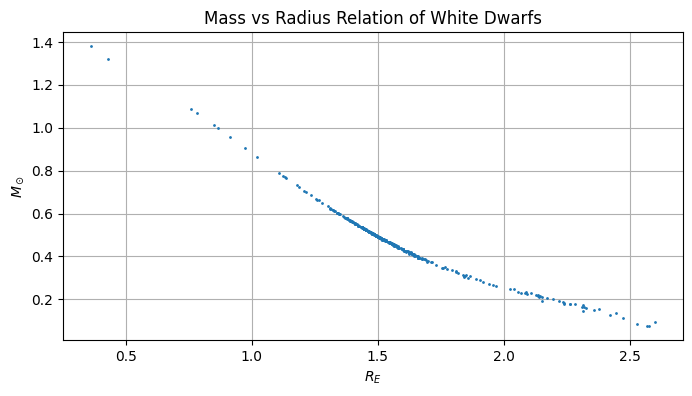

In [2]:
_, logg, M = part_b.read_WD_csv('white_dwarf_data.csv') #Read logg and M from csv
R = part_b.convert_to_radii(M,logg) #Calculate R from logg and M

plt.figure(figsize=(8,4))
plt.plot(R,M,'.',markersize=2) #Plot
plt.xlabel(r'$R_E$')
plt.ylabel(r'$M_\odot$')
plt.title('Mass vs Radius Relation of White Dwarfs')
plt.grid()
plt.show()

### (c)

q = 3


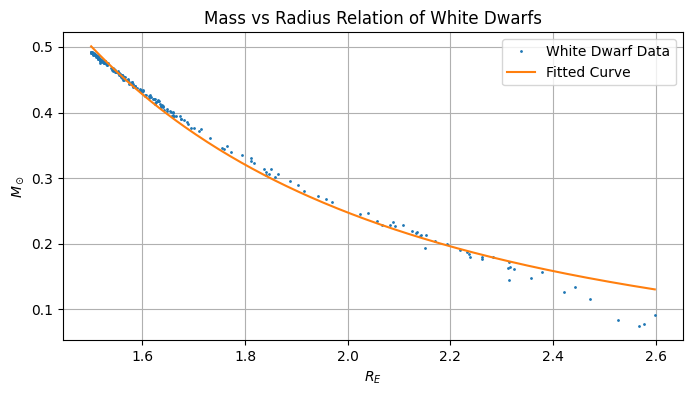

In [3]:
limit = 1.5
A, n = part_c.fit_WD_data(M,R,limit)

_Rs = np.linspace(np.min(R[R > limit]),np.max(R),200) #Linearly Spaced R
plt.figure(figsize=(8,4))
plt.plot(R[R > limit],M[R > limit],'.',markersize=2)  #Plot WD data
plt.plot(_Rs,A*_Rs**((3-n)/(1-n)))                    #Plot interpolated data
plt.xlabel(r'$R_E$')
plt.ylabel(r'$M_\odot$')
plt.title('Mass vs Radius Relation of White Dwarfs')
plt.legend(["White Dwarf Data", "Fitted Curve"])
plt.grid()

q = part_c.get_int_q(n)
print("q = %d" % q)

ξn = 3.6537537362191186
θ'(ξn) = -0.20330128263854588


c:\Users\Görkem\Desktop\PHYS414\Final Project\PHYS414-Final-Project\part_c.py:29: RuntimeWarning: invalid value encountered in scalar power
  du_dξ = -2 / ξ * u - θ**n # du/dξ = -2u/ξ-θ^(3/2)


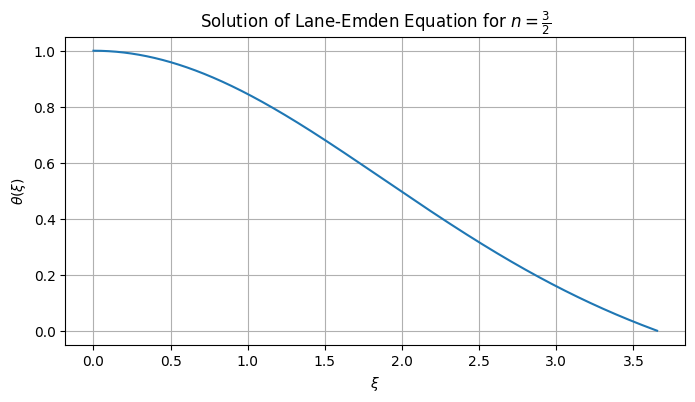

In [4]:
solution = part_c.solve_lane_emden(max_step=1e-4,n=1.5)

plt.figure(figsize=(8,4))
plt.plot(solution.t, solution.y[0])
plt.xlabel(r'$\xi$'); plt.ylabel(r'$\theta(\xi)$'); plt.grid()
plt.title(r'Solution of Lane-Emden Equation for $n=\frac{3}{2}$')

print('ξn = ' + str(solution.t[-1]))
print("θ'(ξn) = " + str(solution.y[1][-1]))

ξn = 3.653753736219
dθdξn = -0.2033012826385

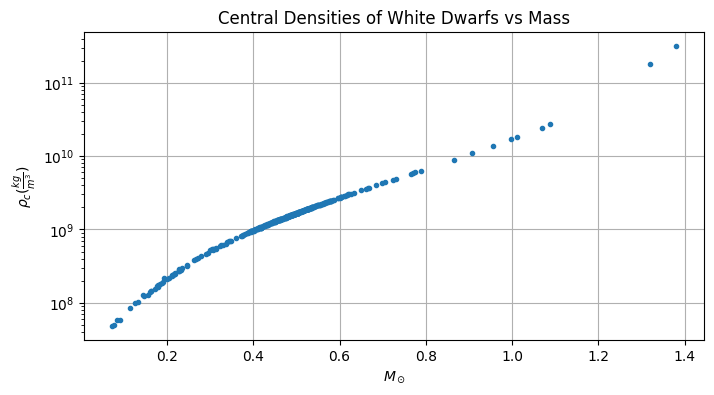

In [5]:
ρc = part_c.calc_central_density(M,R,dθdξn,ξn)
plt.figure(figsize=(8,4))
plt.semilogy(M, ρc, '.')
plt.xlabel(r"$M_\odot$"); plt.ylabel(r'$\rho_c (\frac{kg}{m^3})$')
plt.title('Central Densities of White Dwarfs vs Mass')
plt.grid()

K = 2774995.740493


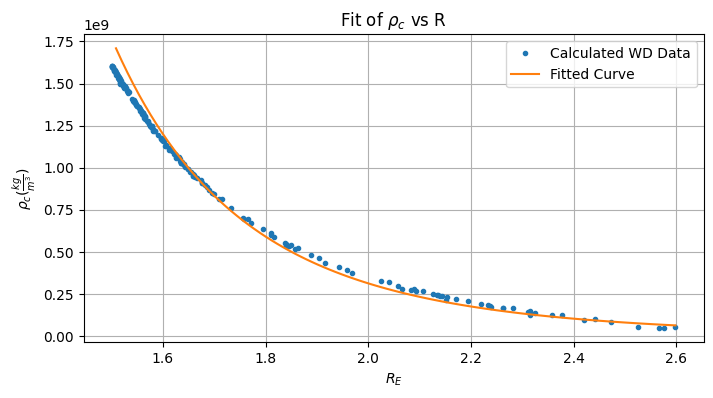

In [6]:
limit = 1.5
K = part_c.fit_K(ρc,R,ξn,limit)

Rs = np.linspace(np.min(R),np.max(R),200)
ρc2 = (4*np.pi*6.6743e-11*Rs**2*6371000**2/(5/2*K*ξn**2))**(-3)

plt.figure(figsize=(8,4))
plt.plot(R[R>limit],ρc[R>limit], '.')
plt.plot(Rs[Rs>limit],ρc2[Rs>limit])
plt.xlabel(r'$R_E$'); plt.ylabel(r'$\rho_c (\frac{kg}{m^3})$'); plt.grid()
plt.legend(['Calculated WD Data','Fitted Curve'])
plt.title(r'Fit of $\rho_c$ vs R')

print('K = %f' % K)

### (d)

Using hydrostatic equilibrium equations and definiton of P(x), we can obtain two coupled first order ODES. First one is $\frac{dm}{dr} = 4\pi r^2 \rho$ <br> 

$\frac{dP}{dr} = -G \frac{m\rho}{r^2}\to \frac{dP}{dx}\frac{dx}{d\rho}\frac{d\rho}{dr} = -G \frac{m\rho}{r^2}$ <br>
$P = C[x\sqrt{x^2+1}(2x^2-3)+3sinh^{-1}(x)]$
$$\frac{dP}{dx} = \frac{8Cx^4}{\sqrt{x^2+1}} \quad \And \quad \frac{dx}{d\rho} = \frac{1}{q}\frac{1}{\rho }(\frac{\rho}{D})^\frac{1}{q}$$
$$\frac{d\rho}{dr} = -G \frac{\sqrt{x^2+1}}{8Cx^5}\frac{qm\rho^2}{r^2}$$

Solving IVPs, using interpolation, and minimizing error using bisection method, we can obtain D and C.

In [7]:
q = 3
D = part_d.bisection_D(ρc,M,R,K,bias=2,n_low=15,trials=5)
C = 5*K*D**(5/q)/8
print('D = %f' % D)
print('C = %f' % C)

c:\Users\Görkem\Desktop\PHYS414\Final Project\PHYS414-Final-Project\part_d.py:31: RuntimeWarning: invalid value encountered in scalar power
  x = (ρ/D)**(1/q)    #x of P(x)


D = 3022830886.153645
C = 10960543496614858194944.000000


### (e)

Mch = 1.474 Msun


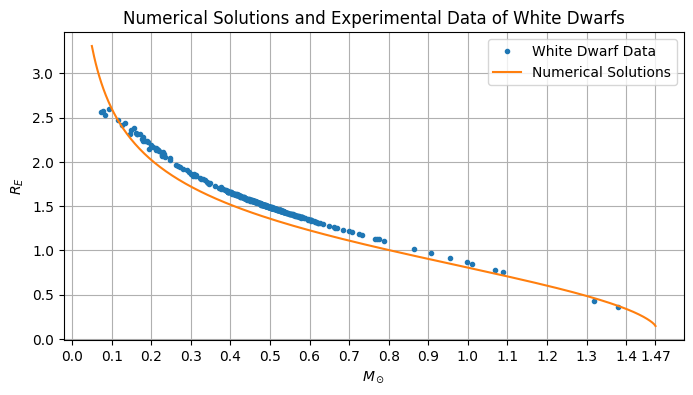

In [8]:
ρc_spaced = np.logspace(np.min(np.log10(ρc)-0.5),np.max(np.log10(ρc)+2),200)
M_calc, R_calc = part_d.solve_system_D(D,ρc_spaced,K)

plt.figure(figsize=(8,4))
plt.plot(M,R,'.')
plt.plot(M_calc,R_calc)
plt.grid()
xticks = np.append(np.arange(0,1.5,0.1).ravel(),M_calc[-1])
labels = ['%.1f' % tick for tick in xticks[:-1]]
labels.append('%.2f' % M_calc[-1])
plt.xticks(xticks, labels)
plt.xlabel(r"$M_\odot$"); plt.ylabel(r'$R_E$');
plt.legend(['White Dwarf Data','Numerical Solutions'])
plt.title('Numerical Solutions and Experimental Data of White Dwarfs')

print('Mch = %.3f Msun' % M_calc[-1])